<a href="https://www.kaggle.com/code/mahimashukla12/binary-classification-churn-problem?scriptVersionId=136093189" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-prediction-for-credit-card-customer/Churn.csv


In [2]:
import pandas as pd
import numpy as np
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
data_cred=pd.read_csv("/kaggle/input/churn-prediction-for-credit-card-customer/Churn.csv")

In [4]:
data_cred.duplicated().sum()

0

In [5]:
data_cred.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data_cred.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df=pd.get_dummies(data_cred,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
X=df.drop(columns=['Exited'])
Y=df['Exited']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=108)

In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scale=scale.fit_transform(X_test)

In [11]:
from keras.activations import sigmoid
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))  #3 neurons for hidden layer
model.add(Dense(1,activation='sigmoid'))       #1 neuron for output since binary classification

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [13]:
#binary_crossentropy is log loss
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [14]:
hist=model.fit(X_train_scaled,Y_train,epochs=12)


Epoch 1/12
250/250 [==============================] - 1s 1ms/step - loss: 0.7047
Epoch 2/12
250/250 [==============================] - 0s 1ms/step - loss: 0.5506
Epoch 3/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4860
Epoch 4/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4591
Epoch 5/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4466
Epoch 6/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4397
Epoch 7/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 8/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4313
Epoch 9/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4284
Epoch 10/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4261
Epoch 11/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4240
Epoch 12/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4220


In [15]:
hist.history

{'loss': [0.7046862244606018,
  0.5505803227424622,
  0.4860069155693054,
  0.45905327796936035,
  0.4466221332550049,
  0.43965286016464233,
  0.43487438559532166,
  0.4312632083892822,
  0.4284057319164276,
  0.4260958731174469,
  0.4239652752876282,
  0.42202088236808777]}

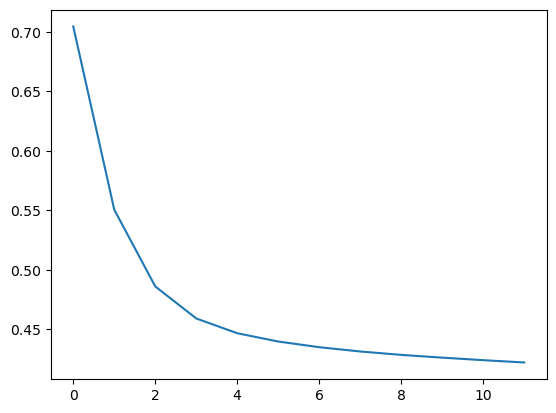

In [16]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])

plt.show()

In [17]:
hist=model.fit(X_train_scaled,Y_train,epochs=20)

Epoch 1/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4201
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4183
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4166
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4149
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4133
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4116
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4101
Epoch 8/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4083
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4065
Epoch 10/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4048
Epoch 11/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4031
Epoch 12/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4014
Epoch 13/20
250/250 [====

In [18]:
hist.history

{'loss': [0.4200901985168457,
  0.41831666231155396,
  0.416574627161026,
  0.4148864448070526,
  0.413277268409729,
  0.4116297662258148,
  0.41006141901016235,
  0.40830865502357483,
  0.4065200686454773,
  0.40480437874794006,
  0.4030859172344208,
  0.40144824981689453,
  0.39995431900024414,
  0.39847761392593384,
  0.3971766531467438,
  0.39579203724861145,
  0.39456707239151,
  0.39339667558670044,
  0.3922126591205597,
  0.39108389616012573]}

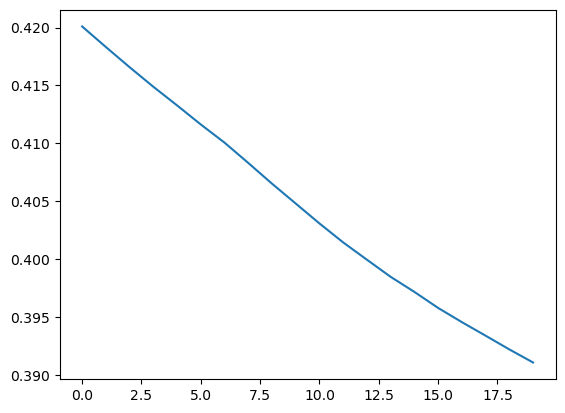

In [19]:
plt.plot(hist.history['loss'])

plt.show()

In [20]:
model.layers[0].get_weights()  # for wights and biases for every input and neurons

[array([[ 0.02915811,  0.04549432, -0.01459224],
        [ 0.83093137, -1.314777  ,  3.067104  ],
        [ 0.19656451,  0.06707658, -0.04832206],
        [ 0.4511144 , -0.4368691 , -0.13599572],
        [ 3.5428224 , -0.49200177,  0.5515886 ],
        [ 0.06017296,  0.06987818, -0.00969757],
        [ 0.9641347 ,  0.8795777 ,  0.07443447],
        [-0.02994785, -0.11434347, -0.04882224],
        [-0.33397257, -0.76264185,  0.19371688],
        [ 0.23566464, -0.09011337, -0.07568339],
        [ 0.06997623,  0.6725258 , -0.11415919]], dtype=float32),
 array([ 0.97729754,  0.45951307, -0.4034995 ], dtype=float32)]

In [21]:
model.layers[1].get_weights()  

[array([[-1.4785   ],
        [-1.9562689],
        [ 1.6259766]], dtype=float32),
 array([-0.44494], dtype=float32)]

In [22]:
model.predict(X_test_scale)

63/63 [==============================] - 0s 1ms/step


array([[0.20826508],
       [0.07194985],
       [0.11254779],
       ...,
       [0.11145082],
       [0.11035002],
       [0.08095973]], dtype=float32)

In [23]:
y_pred=np.where(model.predict(X_test_scale)>0.5,1,0)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8225

In [25]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))  
model.add(Dense(11,activation='relu'))       
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=model.fit(X_train_scaled,Y_train,epochs=40,validation_split=0.2)

Epoch 1/40
200/200 [==============================] - 1s 3ms/step - loss: 0.5403 - accuracy: 0.7822 - val_loss: 0.4687 - val_accuracy: 0.8100
Epoch 2/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7998 - val_loss: 0.4300 - val_accuracy: 0.8156
Epoch 3/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8131 - val_loss: 0.4165 - val_accuracy: 0.8213
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8234 - val_loss: 0.4048 - val_accuracy: 0.8256
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8316 - val_loss: 0.3947 - val_accuracy: 0.8269
Epoch 6/40
200/200 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8383 - val_loss: 0.3841 - val_accuracy: 0.8406
Epoch 7/40
200/200 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8450 - val_loss: 0.3756 - val_accuracy: 0.8450
Epoch 

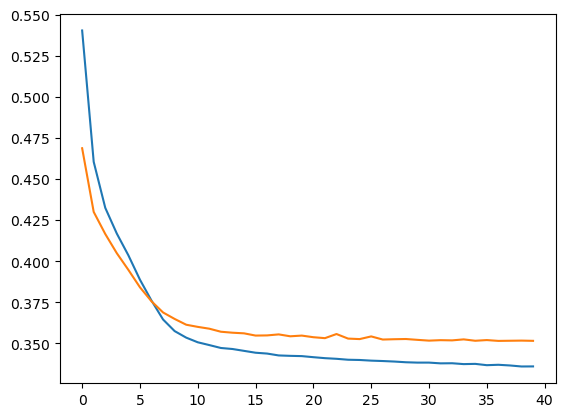

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

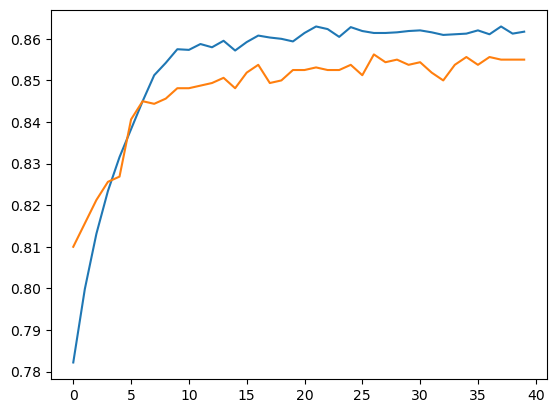

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [29]:
y_pred=np.where(model.predict(X_test_scale)>0.5,1,0)


63/63 [==============================] - 0s 1ms/step


In [30]:
accuracy_score(Y_test,y_pred)

0.856